# Implementación de algorítmo K-Means en Python

Tomado y adaptado de [Python Data Science Netebook]("https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html")

## 1. Carga de librerías necesarias para implementación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


C:\Users\ivang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2. Creación de datos de prueba

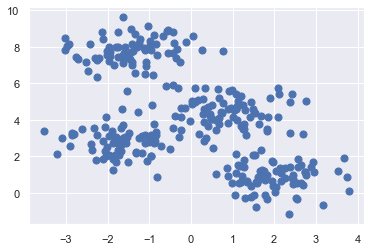

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.75, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## 3. Implementación básica del algorítmo 

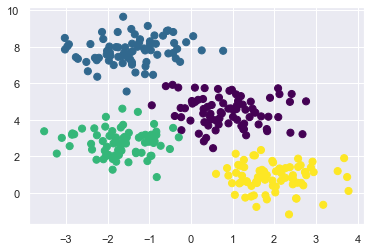

In [3]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## 4. Implementación usando la función de Sklearn

### 4.1 Lo primero que queremos revisar es cual número de clusters minimiza la inercia de cada cluster.

- <em> Explique en sus palabras la importancia del concepto de inercia en la selección de los cluster. </em> Puede revisar [este artículo]("https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c") para complementar su 
análisis. 

- <em> Reflexione acerca del uso de los parámetros "init" y "algorithm" en la inicialización del objeto KMeans</em>

#### Elbow method selection:
Una tecnica básica para la selección de hiperparámetros es la "técnica del codo" en la que se grafica la métrica de evaluación del modelo; en este caso la inercia de cada cluster asociada al **error cuadrático medio**. La intuición detrás de la técnica del codo es seleccionar el valor en el que la tendencia de la métrica de evaluación deja de disminuir abruptamente, en este caso es el valor de 4 ya que después de alcanzar los 4 clusters, la pendiente se mantiene constante a medida que siguen aumentando los cluster.

C:\Users\ivang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1031: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "


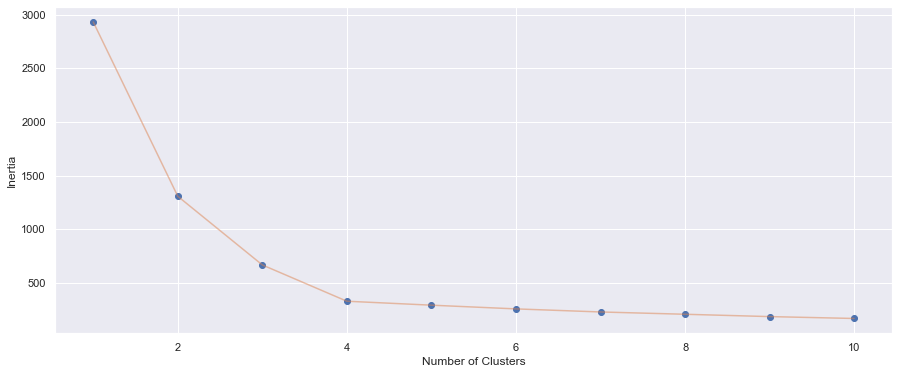

In [4]:
inertia = []
for n in range(1 , 11):
    #Explain the logic behind the selection of 'init' & 'algorithm' arguments
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, tol=0.0001,  random_state= 0  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## 5. Segunda opción de visualización de los cluster

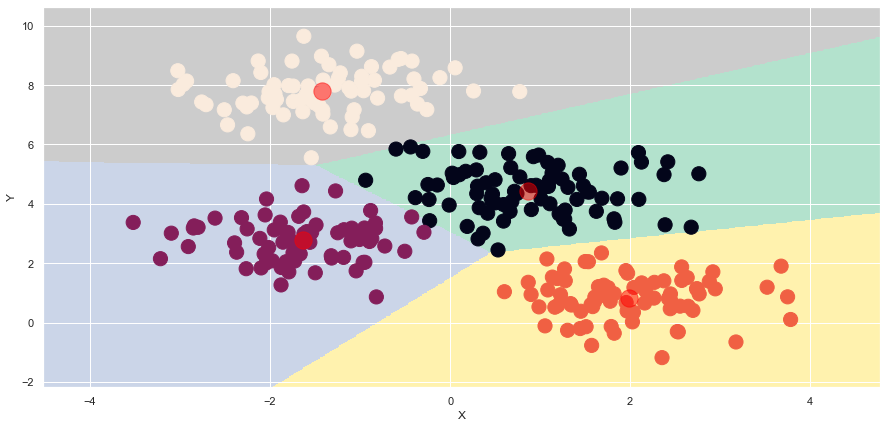

In [5]:
# ---- Algoritmo -------
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                    tol=0.0001,  random_state= 0, algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
# ---------------------- 

# ---- Visualización ------
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = X[:, 0], y = X[:, 1], c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Y') , plt.xlabel('X')
plt.show()